# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = pd.read_csv(url, names = names)

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col= ['class']
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
model1 = DecisionTreeClassifier(max_depth=12, min_samples_leaf=3, criterion = "entropy", random_state = None)
model1.fit(X_train, y_train)

train_acc1 = accuracy_score(y_train, model1.predict(X_train))
val_acc1 = accuracy_score(y_val, model1.predict(X_val))



Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
print("Model 1: High Depth")
print("Training accuracy:", train_acc1)
print("Validation Accuracy:", val_acc1)


Model 1: High Depth
Training accuracy: 0.924643584521385
Validation Accuracy: 0.7317073170731707


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
model2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12, criterion = "entropy", random_state = None)
model2.fit(X_train, y_train)

train_acc2 = accuracy_score(y_train, model2.predict(X_train))
val_acc2 = accuracy_score(y_val, model2.predict(X_val))


Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
print("Model 2: Low Depth")
print("Training accuracy:", train_acc2)
print("Validation Accuracy:", val_acc2)


Model 2: Low Depth
Training accuracy: 0.7841140529531568
Validation Accuracy: 0.7235772357723578


Explain the accuracy results below.

(YOUR ANSWER HERE)
Model1 has a significantly higher training accuracy while Model2 has a slightly higher validation accuracy.

## Metrics

Plot the ROC curve and print the AUC of the second model.

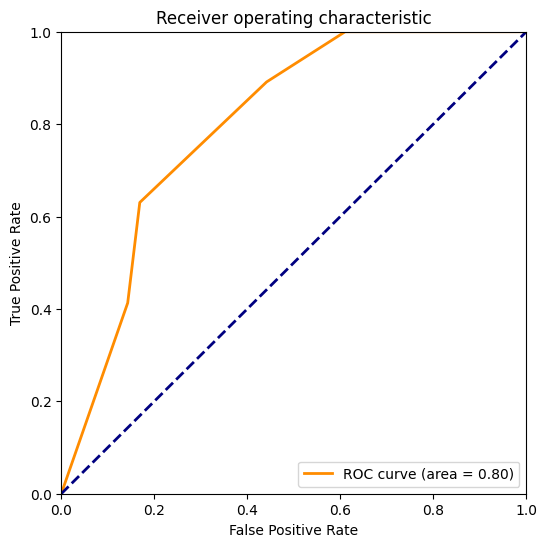

In [ ]:
y_val_prob = model2.predict_proba(X_val,[0,1])

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

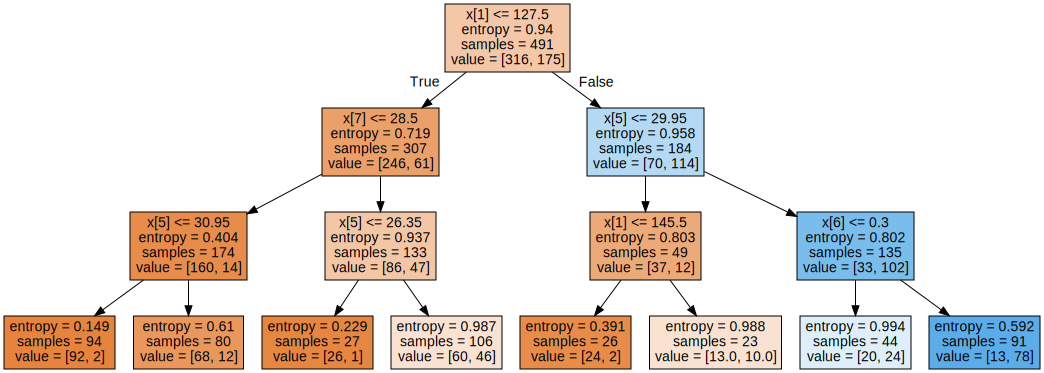

In [ ]:
dot_data = tree.export_graphviz(model2, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?


X[n] represents the value in the nth column.
X[1]corresponds to 'preg'
X[5]corresponds to 'test'
X[7]corresponds to 'pedi'



Question 2: What is the root feature? Does it make sense as the root feature?

Pregnancy is the root feature but it is not the strongest option since it only included pregnant women and entirely excludes men.

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

Due to overfitting, this would drop the validation accuracy and increase the trianing accuracy.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
## YOUR CODE HERE
model3 = DecisionTreeClassifier(max_depth=500, min_samples_leaf=1, criterion = "entropy", random_state = None)
model3.fit(X_train, y_train)

train_acc3 = accuracy_score(y_train, model3.predict(X_train))
val_acc3 = accuracy_score(y_val, model3.predict(X_val))

print("Model 3")
print("Training accuracy:", train_acc3)
print("Validation Accuracy:", val_acc3)



Model 3
Training accuracy: 1.0
Validation Accuracy: 0.6910569105691057


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
# Creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
# Printing accuracy of testing & training data
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  74.79674796747967


How did the accuracy compare to the decision tree's accuracy?

(YOUR ANSWER HERE)
This validation accuracy is slightly higher but similar to the decision tree. This training accuracy is significantly higher.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

importances = random_forest.feature_importances_
feature_importance = pd.DataFrame(importances, X_cols)
feature_importance
feature_importance.columns = ['importance']
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print("Most important features:")
print(feature_importance.head(3))

Most important features:
      importance
plas    0.235611
mass    0.183589
age     0.139793


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

In [ ]:
accuracies = []

for i in range(1,100,5):
  print(i)
  random_forest = RandomForestClassifier(n_estimators=i)
  random_forest.fit(X_train, y_train)
  preds = random_forest.predict(X_val)
  accuracies.append(accuracy_score(y_val,preds))

accuracies

1
6
11
16
21


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

26
31


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


36


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


41


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


46


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


51


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


56


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


61


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


66


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


71


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


76


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


81


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


86


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


91


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


96


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.6910569105691057,
 0.6910569105691057,
 0.7235772357723578,
 0.7317073170731707,
 0.7398373983739838,
 0.7235772357723578,
 0.7642276422764228,
 0.7398373983739838,
 0.7479674796747967,
 0.7560975609756098,
 0.7398373983739838,
 0.7642276422764228,
 0.7642276422764228,
 0.7642276422764228,
 0.7479674796747967,
 0.7479674796747967,
 0.7886178861788617,
 0.7479674796747967,
 0.7398373983739838,
 0.7560975609756098]

In [ ]:
accuracies

[0.6910569105691057,
 0.6910569105691057,
 0.7235772357723578,
 0.7317073170731707,
 0.7398373983739838,
 0.7235772357723578,
 0.7642276422764228,
 0.7398373983739838,
 0.7479674796747967,
 0.7560975609756098,
 0.7398373983739838,
 0.7642276422764228,
 0.7642276422764228,
 0.7642276422764228,
 0.7479674796747967,
 0.7479674796747967,
 0.7886178861788617,
 0.7479674796747967,
 0.7398373983739838,
 0.7560975609756098]

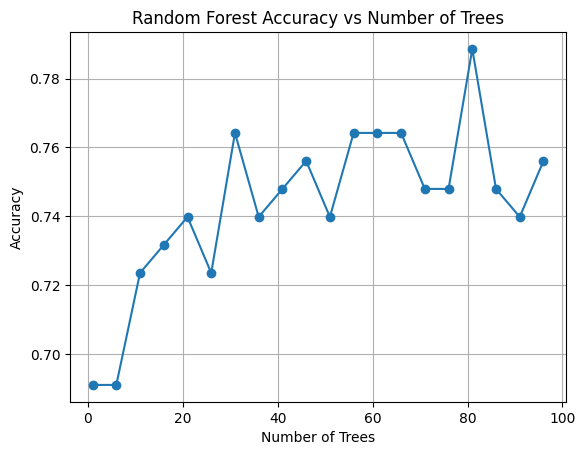

In [ ]:
plt.plot(list(range(1, 101, 5)), accuracies, marker='o')
plt.title("Random Forest Accuracy vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

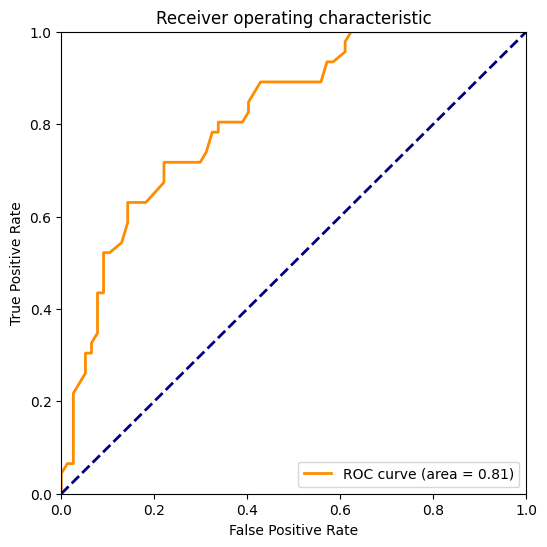

In [ ]:
y_val_prob = random_forest.predict_proba(X_val)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()